In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Thermal optimal path

## Synthetic examples

We reproduce some of the results from [Non-parametric Determination of Real-Time Lag Structure between Two Time Series: the “Optimal Thermal Causal Path” Method, D.Sornette and  W.-X. Zhou (2004)](https://arxiv.org/abs/cond-mat/0408166).

In [2]:
def standardise(ts):
    ts -= np.mean(ts)
    return ts / np.std(ts)

In [3]:
np.random.seed(1)

error_x = 0.1
error_y = error_x / 5
x = np.zeros(300)
y = np.zeros(300)

for i in range(1, 300):
    x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
    
for i in range(10, 100):
    y[i] = x[i-10] + error_y * np.random.randn(1)
    
for i in range(100, 200):
    y[i] = -x[i-5] + error_y * np.random.randn(1)
    
for i in range(200, 300-5):
    y[i] = x[i+5] + error_y * np.random.randn(1)
    
x = standardise(x)
y = standardise(y)

/tmp/ipykernel_8331/791202552.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
/tmp/ipykernel_8331/791202552.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = x[i-10] + error_y * np.random.randn(1)
/tmp/ipykernel_8331/791202552.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = -x[i-5] + error_y * np.random.randn(1)
/tmp/ipykernel_8331/791202552.py:18: DeprecationWarning: Conversion of an arra

In [6]:
x

array([-2.04519038e-01,  1.15304671e+00,  2.34494365e-01, -3.38635411e-01,
       -1.19514665e+00, -1.74683758e-01, -2.10717238e+00, -7.81294217e-02,
       -7.52233928e-01, -3.21278784e-01, -4.94665085e-01,  8.14352637e-01,
       -1.21309570e+00, -1.17998667e+00, -1.20832433e+00,  4.03784091e-02,
       -9.52337890e-01, -8.72101137e-01, -1.40550701e+00, -1.00992998e+00,
       -2.81212027e-01, -1.17805955e+00,  7.07189065e-02,  7.41662574e-01,
        8.77773645e-01,  1.30598680e+00,  2.81401445e-01,  3.29183486e-02,
       -8.20393180e-01, -8.59521551e-01, -2.19769977e-01, -7.93258305e-01,
       -9.48227952e-01, -1.29942795e+00, -1.67734583e+00, -1.79649964e+00,
       -1.32949005e+00, -1.92580401e+00, -1.21350284e+00,  4.76391493e-01,
        8.92290469e-01,  4.02918798e-01, -5.21158901e-01, -1.05061328e+00,
        6.17703838e-01,  4.13500154e-01, -3.04282209e-01, -1.14793395e-01,
        1.61360185e+00,  1.16858984e+00,  1.27249194e+00,  1.08025952e+00,
        4.00429000e-01, -

In [4]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

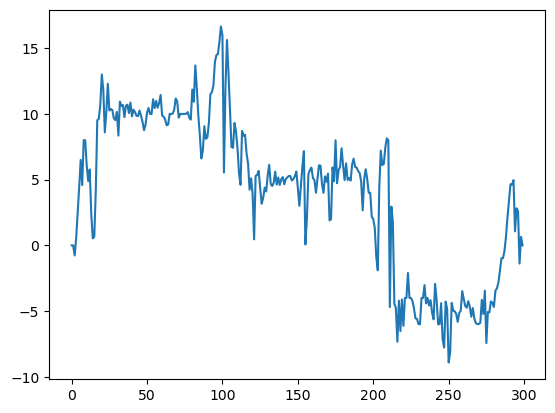

In [5]:
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path

temperature = 0.1
g = partition_function(x, y, temperature)
avg = average_path(g)
plt.plot(avg[::2])

In [13]:
print(len(g[0]))

300


In [14]:
g

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.85672677e-05, 6.18920416e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.32188171e-01, 5.36107690e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.71629789e-31, 2.88349573e-31, 2.23918829e-31],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.74412551e-31, 2.13992157e-31, 1.66326421e-31],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.23170679e-32, 4.86365502e-32, 3.78828268e-32]])

In [7]:
print(avg)

[ 0.          0.          0.         -0.99998309 -0.76628483 -0.29953641
  0.55219475  1.4880107   2.45511848  3.43678851  4.42608004  5.41963323
  6.50595007  6.99959662  4.58630459  6.98651783  8.00021407  6.99370061
  8.00000006  5.2182685   6.0705309   4.16766466  4.88802382  3.02378126
  5.7701899   3.34703717  2.41886686  1.19589882  0.53480101  9.65356397
  0.65488246  8.80797125  4.10820934  9.5817533   9.51942737  8.76681003
  9.62630047 11.22974299 10.70150116 11.08926552 12.99985867 12.3778014
 11.82548191 11.60632377  8.59679551 13.57193265 10.14073559 12.7854285
 12.29912579 10.03405739 10.26514716 14.8843111  10.37467769 14.12207905
 10.29395087 11.02895657  9.64945566  9.98533535  9.53367333  8.81518082
 10.15646445  8.27744688  8.35149766  8.27577467 10.93307077 11.2369058
 10.60940777 11.42566903 10.68089569  9.72908217  9.75528947 10.84103346
 10.62730014 10.80699346 10.70729554 10.97437764 10.06762416 10.77965419
 10.86519206 11.30581445  9.81769011  9.60038309 10.32

## Running time measurements

We motivate the Numba implementation provided by comparing it to running the same Python code in the original interpreter. Running time is reduced by a factor of ~1000.

In [9]:
%%timeit
g = partition_function(x, y, 0.1)

1.93 ms ± 29.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
from thermal_optimal_path.error_models import error
from thermal_optimal_path.lattice import _partition_function_impl

In [11]:
%%timeit
g = _partition_function_impl.py_func(x, y, 0.1, error)

3.62 s ± 383 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
